   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

/home/rawang9/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/rawang9/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


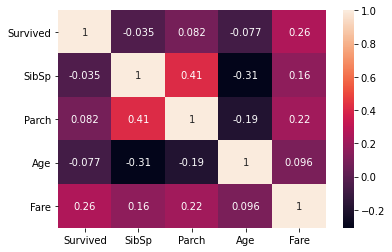

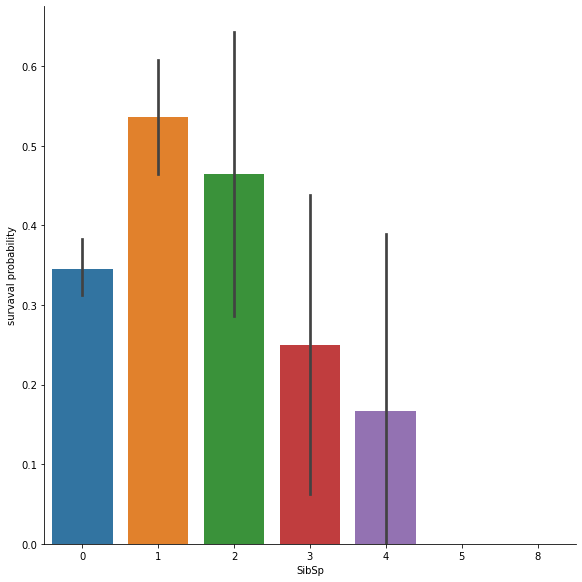

In [4]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
data=pd.read_csv("titanic data.csv")
print(data.head())
print(data.info())
#checking for null val
print(data.isnull().sum())

#check the most depended factor for survived using heatmap
#Numerical Value Analysis
heatmap=sea.heatmap(data[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True)
#plt.show()
#Only Fare feature seems to have a significative correlation with the survival probability.
#sibsp - Number of siblings / spouses aboard the Titanic
print(data["SibSp"].unique())
bargraph_sib=sea.factorplot(x="SibSp",y="Survived",data=data,kind="bar",size=8)
bargraph_sib=bargraph_sib.set_ylabels("survaval probability")
plt.show()
#It seems that passengers having a lot of siblings/spouses have less chance to survive.
#Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive.


/home/rawang9/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rawang9/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rawang9/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


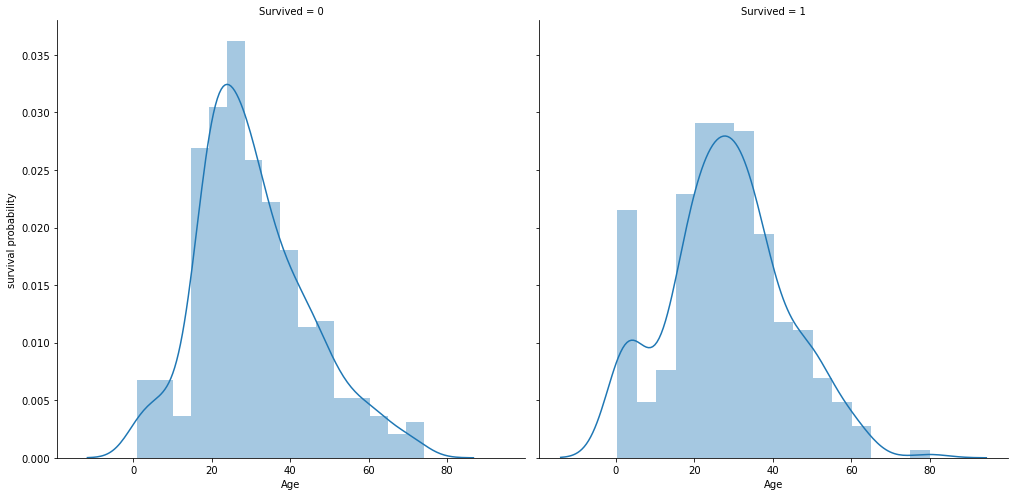

In [8]:

age_visual = sea.FacetGrid(data, col = 'Survived', size=7)
age_visual = age_visual.map(sea.distplot, "Age")
age_visual = age_visual.set_ylabels("survival probability")

In [9]:
# #we can clearly see the peek for young age
# Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

# We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived.

# So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

# It seems that very young passengers have more chance to survive.

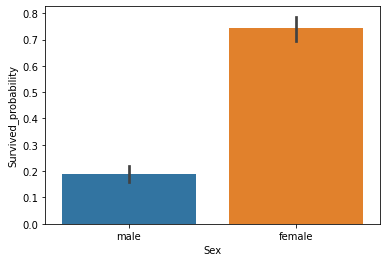

In [11]:
#sex
sex_plot = sea.barplot(x="Sex",y="Survived",data=data)
sex_plot =  sex_plot.set_ylabel("Survived_probability")

In [13]:
data[["Sex","Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [14]:
# #high chance for female to survive
# It is clearly obvious that Male have less chance to survive than Female. So Sex, might play an important role in the prediction of the survival. For those who have seen the Titanic movie (1997),
#I am sure, we all remember this sentence during the evacuation
#- Women and children first

/home/rawang9/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


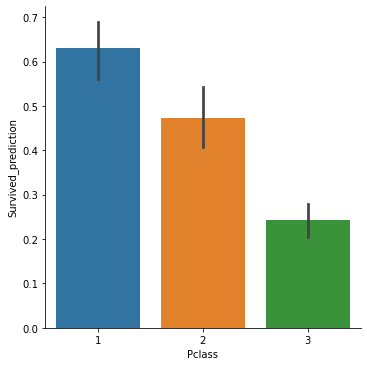

In [17]:
pclass= sea.factorplot(x="Pclass",y="Survived",data=data,kind="bar")
pclass=pclass.set_ylabels("Survived_prediction")

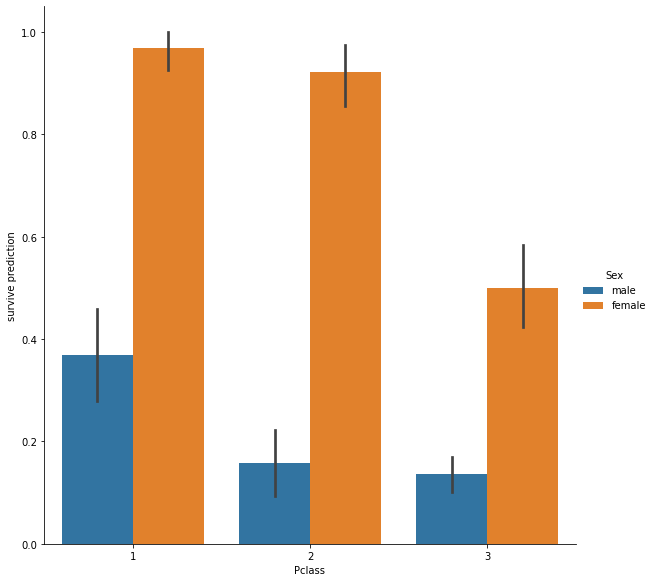

In [19]:
#Pclass vs Survived by Sex
pss=sea.factorplot(x="Pclass",y="Survived",data=data,hue="Sex",size=8,kind="bar")
pss=pss.set_ylabels("survive prediction")

In [20]:
#Embarked
data["Embarked"].isnull().sum()


2

In [21]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
#Fill Embarked with 'S' i.e. the most frequent values
data["Embarked"] = data["Embarked"].fillna("S")

In [24]:

data["Embarked"].isnull().sum()

0

/home/rawang9/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/rawang9/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


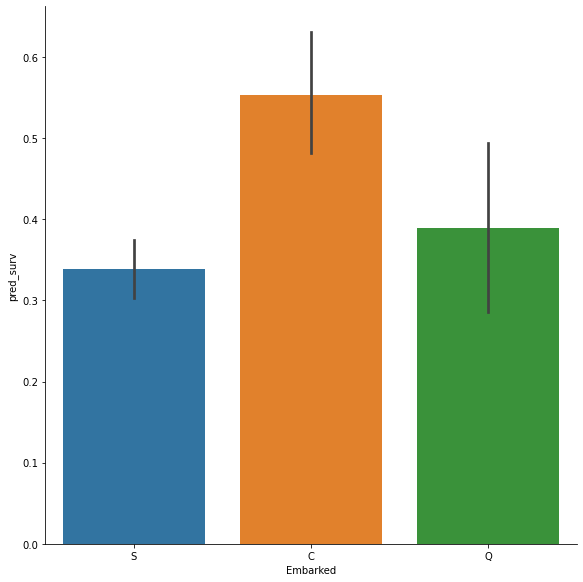

In [28]:
emba=sea.factorplot(x="Embarked",y="Survived",data=data,size=8,kind="bar")
emba=emba.set_ylabels("pred_surv")

/home/rawang9/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/rawang9/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rawang9/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


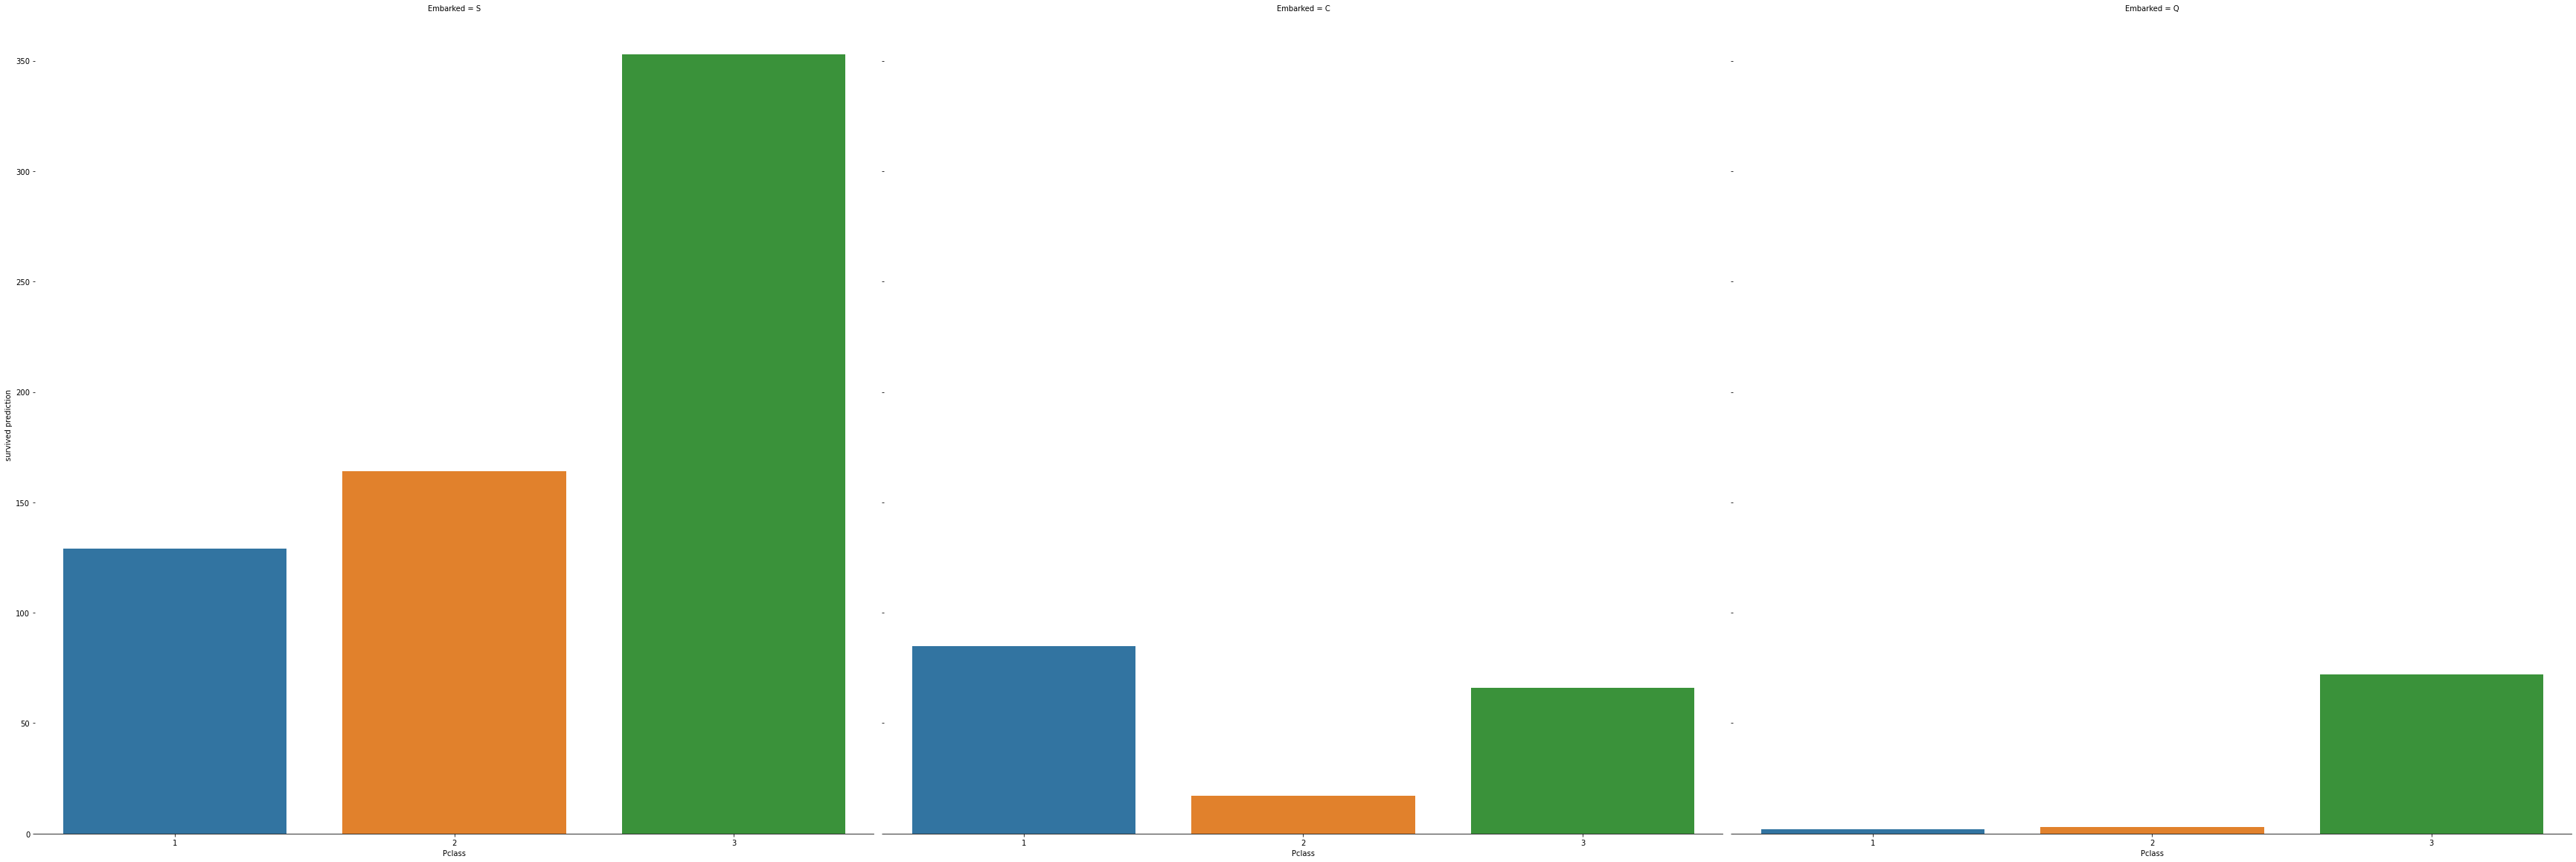

In [34]:
# Explore Pclass vs Embarked
g=sea.factorplot("Pclass",col="Embarked",data=data,kind="count",size=16)
g.despine(left=True)
g=g.set_ylabels("survived prediction")

In [35]:
# Cherbourg passengers are mostly in first class which have the highest survival rate.
# Southampton (S) and Queenstown (Q) passangers are mostly in third class

In [36]:
data=pd.read_csv("titanic data.csv")

In [37]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
#filling the age colum
mean=data.Age.mean()
std=data.Age.std()
is_null=data.Age.isnull().sum()
rand_age=np.random.randint(mean-std,mean+std,size=is_null)
# fill NaN values in Age column with random values generated
age_slice=data.Age.copy()
age_slice[np.isnan(age_slice)] = rand_age
data.Age=age_slice

In [50]:
data.Age.isnull().sum()

0

In [52]:
#with embarked
data["Embarked"]=data["Embarked"].fillna("S")

In [54]:
col_to_drop=["PassengerId","Name","Ticket","Cabin"]
data.drop(col_to_drop,axis=1,inplace=True)

In [56]:
gender={"male":0,"female":1}
data["Sex"]=data["Sex"].map(gender)

In [58]:
embark={"S":0,"C":1,"Q":2}
data["Embarked"]=data["Embarked"].map(embark)


In [59]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,25.0,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
7,0,3,0,2.0,3,1,21.0750,0
8,1,3,1,27.0,0,2,11.1333,0
9,1,2,1,14.0,1,0,30.0708,1


In [60]:
x=data.drop(data.columns[[0]],axis=1)
y=data.Survived

In [62]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=0)

In [83]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [85]:
#importing the training model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#declaration
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier(n_estimators=1000,criterion="entropy",random_state=0)
svc=SVC()
knc=KNeighborsClassifier(n_neighbors=5)
#trinag
lr.fit(xtrain,ytrain)
dtc.fit(xtrain,ytrain)
rfc.fit(xtrain,ytrain)
svc.fit(xtrain,ytrain)
knc.fit(xtrain,ytrain)
#predicting
lr_pred = lr.predict(xtest)
dtc_pred = dtc.predict(xtest)
rfc_pred = rfc.predict(xtest)
svc_pred = svc.predict(xtest)
knc_pred = knc.predict(xtest)
from sklearn.metrics import accuracy_score
# finding accuracy
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, lr_pred)
svc_classifier_acc = accuracy_score(ytest, svc_pred)
dt_classifier_acc = accuracy_score(ytest, dtc_pred)
knn_classifier_acc = accuracy_score(ytest, knc_pred)
rf_classifier_acc = accuracy_score(ytest, rfc_pred)
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  79.48
Support Vector      :  81.34
Decision Tree       :  76.87
K-NN Classifier     :  80.22
Random Forest       :  82.46
